In [3]:
!pip install pyserial

# Upload Libraries Required

In [936]:
!conda install -c conda-forge geopy --yes 

Solving environment: ...working... done

# All requested packages already installed.



In [937]:
# importing libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

from bs4 import BeautifulSoup

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy.geocoders # convert an address into latitude and longitude values


# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes
import folium

 # map rendering library



print('Libraries are imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

# All requested packages already installed.

Libraries are imported.


In [938]:

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


# 1. Download and Explore Dataset

In [939]:
!wget -q -O 'nyu_geojson.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [940]:
#Load and explore the data

with open('nyu_geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [941]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [942]:
neighborhoods_data = newyork_data['features']

In [943]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Tranform the data into a pandas dataframe

In [944]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [945]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [946]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [947]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [948]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


# Use geopy library to get the latitude and longitude values of New York City

In [1032]:
latitude = 40.7128;longitude = -74.0060

# add markers to map
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork


# Manhattan

In [950]:

Manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [1037]:

# add markers to map
map_Manhattan = folium.Map(location=[40.7900869, -73.9598295], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(Manhattan_data['Latitude'], Manhattan_data['Longitude'], Manhattan_data['Borough'], Manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Manhattan)  
    
map_Manhattan


# Define Foursquare Credentials and Version

In [952]:
CLIENT_ID = '5XPWMTODW5TFSP0VDPTG4IWDI2VUSKUJ1QBFKWDD4ZTPDVIA' 
CLIENT_SECRET = '5IJFCHTM1KLYW34IBQESCMRMVS5BG2Z3HHZQALNME4HB34AD' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5XPWMTODW5TFSP0VDPTG4IWDI2VUSKUJ1QBFKWDD4ZTPDVIA
CLIENT_SECRET:5IJFCHTM1KLYW34IBQESCMRMVS5BG2Z3HHZQALNME4HB34AD


In [953]:
#Let's explore the first neighborhood in our dataframe.
#Get the neighborhood's name

In [954]:
Manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [956]:
#Get the neighborhood's latitude and longitude values.
neighborhood_latitude = Manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [957]:
# Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.¶
# First, let's create the GET request URL.

In [958]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius



 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=5XPWMTODW5TFSP0VDPTG4IWDI2VUSKUJ1QBFKWDD4ZTPDVIA&client_secret=5IJFCHTM1KLYW34IBQESCMRMVS5BG2Z3HHZQALNME4HB34AD&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [959]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c8718c7dd57977bd6cb6e29'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [961]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [962]:
# Now we are ready to clean the json and structure it into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Land & Sea Restaurant,Seafood Restaurant,40.877885,-73.905873


In [963]:
# And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


# 2. Explore Neighborhoods in  Manhattan


In [965]:
# create a function to repeat the same process to all the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [967]:
# Now write the code to run the above function on each neighborhood and create a new dataframe called Manhattan_venues.

Manhattan_venues = getNearbyVenues(names=Manhattan_data['Neighborhood'],
                                   latitudes=Manhattan_data['Latitude'],
                                   longitudes=Manhattan_data['Longitude'] )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [969]:
# check the size of the resulting dataframe
print(Manhattan_venues.shape)
Manhattan_venues.head()

(3311, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant


In [970]:
#L et's check the size of the resulting dataframe
Manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,98,98,98,98,98,98
Carnegie Hill,100,100,100,100,100,100
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,43,43,43,43,43,43
East Village,100,100,100,100,100,100


In [972]:
## Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(Manhattan_venues['Venue Category'].unique())))
Manhattan_venues.groupby('Neighborhood').count()

There are 336 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,98,98,98,98,98,98
Carnegie Hill,100,100,100,100,100,100
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,43,43,43,43,43,43
East Village,100,100,100,100,100,100


# Analyze Each Neighborhood

In [974]:
# one hot encoding
Manhattan_onehot = pd.get_dummies(Manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Manhattan_onehot['Neighborhood'] =Manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Manhattan_onehot.columns[-1]] + list(Manhattan_onehot.columns[:-1])
Manhattan_onehot = Manhattan_onehot[fixed_columns]

Manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping 

In [975]:
Manhattan_onehot.shape

(3311, 337)

In [976]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

Manhattan_grouped =Manhattan_onehot.groupby('Neighborhood').mean().reset_index()
Manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping 

In [977]:
Manhattan_grouped.shape

(40, 337)

# Let's print each neighborhood along with the top 5 most common venues

In [979]:
num_top_venues = 5
for hood in Manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Manhattan_grouped[Manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.08
2          Hotel  0.05
3  Shopping Mall  0.03
4      Wine Shop  0.03


----Carnegie Hill----
               venue  freq
0        Pizza Place  0.06
1               Café  0.05
2        Coffee Shop  0.05
3                Bar  0.04
4  French Restaurant  0.03


----Central Harlem----
                  venue  freq
0    Chinese Restaurant  0.07
1    African Restaurant  0.07
2   American Restaurant  0.04
3  Gym / Fitness Center  0.04
4    Seafood Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.07
1  Italian Restaurant  0.06
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1    American Restaurant  0.04
2           Cocktail Bar  0.04
3  Vietnamese Restaurant  0.04
4     Dim Sum Restaurant  0.04


----Civic Center----
                  venue  freq


# Let's put that into a pandas dataframe

In [982]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [984]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Manhattan_grouped['Neighborhood']

for ind in np.arange(Manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Manhattan_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Shopping Mall,Wine Shop,Italian Restaurant,Gym,Burger Joint,Food Truck,Food Court
1,Carnegie Hill,Pizza Place,Café,Coffee Shop,Bar,Yoga Studio,Bookstore,Cosmetics Shop,Japanese Restaurant,Gym,French Restaurant
2,Central Harlem,Chinese Restaurant,African Restaurant,Cosmetics Shop,Gym / Fitness Center,French Restaurant,American Restaurant,Seafood Restaurant,Public Art,Bar,Dessert Shop
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,American Restaurant,Bakery,Seafood Restaurant,Theater,Hotel,French Restaurant
4,Chinatown,Chinese Restaurant,Dim Sum Restaurant,American Restaurant,Cocktail Bar,Vietnamese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Salon / Barbershop,Bakery,Noodle House


# Cluster Neighborhoods

In [992]:
# set number of clusters
kclusters = 5
# create a new dataframe

manhattan_grouped_clustering = Manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 2, 2, 1, 4, 2, 2])

In [994]:
Manhattan_merged =Manhattan_data
# merge Manhatta_grouped with Manhattan_data to add latitude/longitude for each neighborhood
Manhattan_merged = Manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Clothing Store,Big Box Store,Supplement Shop,Steakhouse,Spa,Shoe Store,Seafood Restaurant,Sandwich Place
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Dim Sum Restaurant,American Restaurant,Cocktail Bar,Vietnamese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Salon / Barbershop,Bakery,Noodle House
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Park,Deli / Bodega,Sandwich Place,Tapas Restaurant,New American Restaurant,Donut Shop
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Café,Pizza Place,Lounge,Frozen Yogurt Shop,Chinese Restaurant,Restaurant,Park,Deli / Bodega,Wine Bar
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Mexican Restaurant,Deli / Bodega,Café,Coffee Shop,Pizza Place,Caribbean Restaurant,Chinese Restaurant,Bakery,School,Sandwich Place


In [997]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Manhattan_merged['Latitude'], Manhattan_merged['Longitude'], Manhattan_merged['Neighborhood'], Manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# let's explore the most major commercial intersection, tourist destination in Manhattan

In [848]:
## Load and explore the data

df=pd.read_csv('Times_Square_Entertainment_Venues.csv')
print(df.shape)

df.head()


(82, 17)


,Company Name,Subindustry,Sub Subindustry,Address,Phone,Website,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,Location 1
0,Al Hirschfeld Theater,Theater,League,302 W 45th St,(212) 239-6200,NaN,1,10036.0,40.759351,-73.988864,104.0,3.0,121.0,1024993.0,1.010350e+09,Clinton ...,"302 W 45th St\n(40.759351, -73.988864)"
1,The World Famous Laugh Factory,Comedy Club,NaN,303 W 42nd St,212-586-7829 x304,NaN,1,10036.0,40.757436,-73.990254,104.0,3.0,121.0,1024947.0,1.010330e+09,Clinton ...,"303 W 42nd St\n(40.757436, -73.990254)"
2,Bernard B. Jacobs Theatre,Theater,League,242 W 45th St,(212) 239-2820,NaN,1,10036.0,40.758704,-73.987294,105.0,3.0,119.0,1024716.0,1.010160e+09,Midtown-Midtown South ...,"242 W 45th St\n(40.758704, -73.987294)"
3,Music Box Theater,Theater,League,239 W 45th St,212 239-6200,NaN,1,10036.0,40.758660,-73.987146,105.0,3.0,119.0,1024726.0,1.010170e+09,Midtown-Midtown South ...,"239 W 45th St\n(40.75866, -73.987146)"
4,Helen Hayes Theatre,Theater,League,240 W 44th St,(212) 944-9457,NaN,1,10036.0,40.757968,-73.987532,105.0,3.0,119.0,1024708.0,1.010150e+09,Midtown-Midtown South ...,"240 W 44th St\n(40.757968, -73.987532)"


In [734]:
# clean data
df.drop(['Sub Subindustry', 'Phone', 'Website', 'Community Board', 'BIN', 'BBL'], axis=1, inplace=True)
df.set_index('Subindustry', inplace = True)
# let's view the first five elements and see how the dataframe was changed
df.head()

,Company Name,Address,Borough,Postcode,Latitude,Longitude,Community Council,Census Tract,NTA,Location 1
Subindustry,,,,,,,,,,
Theater,Al Hirschfeld Theater,302 W 45th St,1,10036.0,40.759351,-73.988864,3.0,121.0,Clinton ...,"302 W 45th St\n(40.759351, -73.988864)"
Comedy Club,The World Famous Laugh Factory,303 W 42nd St,1,10036.0,40.757436,-73.990254,3.0,121.0,Clinton ...,"303 W 42nd St\n(40.757436, -73.990254)"
Theater,Bernard B. Jacobs Theatre,242 W 45th St,1,10036.0,40.758704,-73.987294,3.0,119.0,Midtown-Midtown South ...,"242 W 45th St\n(40.758704, -73.987294)"
Theater,Music Box Theater,239 W 45th St,1,10036.0,40.758660,-73.987146,3.0,119.0,Midtown-Midtown South ...,"239 W 45th St\n(40.75866, -73.987146)"
Theater,Helen Hayes Theatre,240 W 44th St,1,10036.0,40.757968,-73.987532,3.0,119.0,Midtown-Midtown South ...,"240 W 44th St\n(40.757968, -73.987532)"


In [735]:
# let's count Entertainment Subindustry
df1=df.groupby('Subindustry').count()

df1

,Company Name,Address,Borough,Postcode,Latitude,Longitude,Community Council,Census Tract,NTA,Location 1
Subindustry,,,,,,,,,,
Attractions / Amusement,3,3,3,3,3,3,3,3,3,3
Comedy Club,4,4,4,4,4,4,4,4,4,4
Lecture Hall,1,1,1,1,1,1,1,1,1,1
Live Music,4,4,4,4,4,4,4,4,4,4
Movies,4,4,4,4,4,4,4,4,4,4
Museums / Galleries,6,6,6,6,6,6,6,6,6,6
Nightclub,11,11,11,10,10,10,10,10,10,11
Theater,49,49,49,48,48,48,48,48,48,49


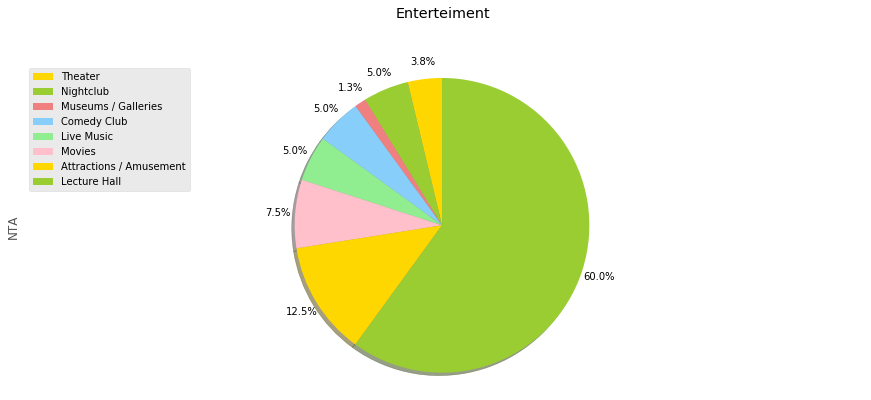

In [736]:
# vizualation data with pie chart
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df1['NTA'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                         
                            )
# scale the title up by 12% to match pctdistance
plt.title('Entertainment', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_Enterteiment.index, loc='upper left') 

plt.show()

In [1006]:
# define a null valeus
df.isnull().sum()

Company Name           0
Subindustry            0
Sub Subindustry       33
Address                0
Phone                 13
Website               42
Borough                0
Postcode               2
Latitude               2
Longitude              2
Community Board        2
Community Council      2
Census Tract           2
BIN                    2
BBL                    2
NTA                    2
Location 1             0
dtype: int64

In [1043]:
df2=df1.dropna()
df2

,Company Name,Subindustry,Sub Subindustry,Address,Phone,Website,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,Location 1
12,Brooks Atkinson Theatre,Theater,League,256 W 47th St,(212) 719-4099,http://www.brooksatkinsontheater.com/,1,10036.0,40.759936,-73.986381,105.0,3.0,125.0,1024747.0,1.010180e+09,Midtown-Midtown South ...,"256 W 47th St\n(40.759936, -73.986381)"
17,St Luke's Theater,Theater,Off-Broadway,308 W 46th St,(212) 246-8140,http://stlukestheatre.com/,1,10036.0,40.760032,-73.988518,104.0,3.0,121.0,1025013.0,1.010360e+09,Clinton ...,"308 W 46th St\n(40.760032, -73.988518)"
22,Snapple Theater (Jerry Orbach Theater),Theater,Broadway - Non-League,1627 Broadway,(212) 246-3828,http://www.snappletheater.com,1,10019.0,40.761280,-73.984168,105.0,3.0,125.0,1024802.0,1.010210e+09,Midtown-Midtown South ...,"1627 Broadway\n(40.76128, -73.984168)"
27,American Theatre Wing,Theater,Off-Broadway,"570 Seventh Ave, Suite 501",212-765-0606 x311,http://americantheatrewing.org/,1,10018.0,40.755119,-73.987638,105.0,3.0,113.0,1024649.0,1.010128e+09,Midtown-Midtown South ...,"570 Seventh Ave, Suite 501\n(40.755119, -73.98..."
29,Nederlander Theatre,Theater,League,208 W 41st St,(212) 921-8000,http://www.nederlandertheatre.com/,1,10036.0,40.755616,-73.988038,105.0,3.0,113.0,1024651.0,1.010120e+09,Midtown-Midtown South ...,"208 W 41st St\n(40.755616, -73.988038)"
30,New Amsterdam Theater,Theater,League,214 W 42nd St,(212) 282-2900,http://www.newyorkcitytheatre.com/theaters/new...,1,10036.0,40.756324,-73.987652,105.0,3.0,113.0,1024660.0,1.010130e+09,Midtown-Midtown South ...,"214 W 42nd St\n(40.756324, -73.987652)"
35,Richard Rodgers Theatre,Theater,League,226 W 46th St,(212) 221-1211 ,http://www.richardrodgerstheatre.com/,1,10036.0,40.759055,-73.986211,105.0,3.0,119.0,1024728.0,1.010170e+09,Midtown-Midtown South ...,"226 W 46th St\n(40.759055, -73.986211)"
39,Minskoff Theatre,Theater,League,200 W 45th St,(212) 869-0550,www.minskofftheatre.com,1,10036.0,40.758039,-73.985717,105.0,3.0,119.0,1024714.0,1.010160e+09,Midtown-Midtown South ...,"200 W 45th St\n(40.758039, -73.985717)"
42,The New Victory Theater,Theater,Nonprofit,229 W 42nd St\nFl 10,(646) 223-3063,www.newvictory.org,1,10036.0,40.756571,-73.988190,105.0,3.0,119.0,1024683.0,1.010140e+09,Midtown-Midtown South ...,"229 W 42nd St Fl 10\n(40.756571, -73.98819)"
51,The Cort Theatre,Theater,League,138 W 48th St,(212) 239-2820,http://www.newyorkcitytheatre.com/theaters/cor...,1,10105.0,40.759142,-73.982540,105.0,4.0,125.0,1022679.0,1.010000e+09,Midtown-Midtown South ...,"138 W 48th St\n(40.759142, -73.98254)"


In [1014]:
df2.shape

(20, 17)

In [ ]:
# using Folium map to show the loacation of subindustry in times square

In [1023]:

map_E= folium.Map(location=[latitude, longitude], zoom_start=13.5)

# add markers of Subindustry locations to map
for lat, lng, label,borough,Subi in zip(df2['Latitude'], df2['Longitude'],df2['Address'],df2['Borough'],df2['Subindustry'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_E) 
map_E

# let's explore the Manhattan Cultural Tourism Grant

In [739]:
#load the data
mh=pd.read_csv('Tourism_Grants.csv')

print(mh.shape)

mh.head()


(45, 19)


,FY,Agency,Organization Name,Project Title,Amount Requested,Funded Amount,Community Board,Organization Address,City,State,Postcode,Borough,Latitude,Longitude,Council District,Census Tract,BIN,BBL,NTA
0,12,CT,"Nuyorican Poets Café, Inc.",The Nuyorican Poets CafÃ© Poetry Slam Series a...,10000.0,0.0,3.0,236 East 3rd Street,New York,New York,10009,MANHATTAN,40.722274,-73.982048,2.0,2202.0,1004592.0,1.003850e+09,Lower East Side ...
1,12,CT,Transportation Alternatives,Bike Friendly District,6000.0,0.0,4.0,127 West 26th Street #1002,New York,New York,10001,MANHATTAN,40.745225,-73.992396,3.0,95.0,1015037.0,1.008020e+09,Midtown-Midtown South ...
2,12,CT,New York Scandia Symphony,The Scandinavian Music Festival,8000.0,0.0,12.0,"720 Fort Washington Avenue, #5D",New York,New York,10040,MANHATTAN,40.857943,-73.934962,10.0,281.0,1064475.0,1.021801e+09,Washington Heights North ...
3,12,CT,Battery Dance Corporation,Downtown Dance Festival,7500.0,0.0,1.0,380 Broadway 5th Floor,New York,New York,10013,MANHATTAN,40.718112,-74.002958,1.0,31.0,1002317.0,1.001950e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
4,12,CT,"Lower East Side Performing Arts, Inc.",Op On Screen Women,2500.0,0.0,1.0,268 East Broadway #A-1102,New York,New York,10002,MANHATTAN,40.714499,-73.984979,1.0,1401.0,1082654.0,1.003150e+09,Lower East Side ...


In [740]:
# drop the colunm's the we dont need them
mh.drop(['FY', 'Agency', 'Organization Name', 'Funded Amount', 'Community Board', 'City','Postcode','BBL','Census Tract','BIN','NTA'], axis=1, inplace=True)
mh.set_index('Project Title', inplace = True)
# let's view the first five elements and see how the dataframe was changed
mh.head()

,Amount Requested,Organization Address,State,Borough,Latitude,Longitude,Council District
Project Title,,,,,,,
The Nuyorican Poets CafÃ© Poetry Slam Series and Slam Team Events,10000.0,236 East 3rd Street,New York,MANHATTAN,40.722274,-73.982048,2.0
Bike Friendly District,6000.0,127 West 26th Street #1002,New York,MANHATTAN,40.745225,-73.992396,3.0
The Scandinavian Music Festival,8000.0,"720 Fort Washington Avenue, #5D",New York,MANHATTAN,40.857943,-73.934962,10.0
Downtown Dance Festival,7500.0,380 Broadway 5th Floor,New York,MANHATTAN,40.718112,-74.002958,1.0
Op On Screen Women,2500.0,268 East Broadway #A-1102,New York,MANHATTAN,40.714499,-73.984979,1.0


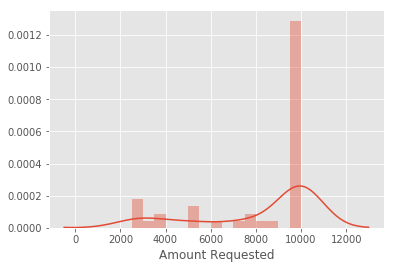

In [741]:
# The highest amount of grant reuestesd 
import seaborn as sns
sns.distplot(mh['Amount Requested'],bins=15)


In [742]:
mh1= mh.dropna()


In [743]:
print('The dataframe has {} boroughs and {}Project Title .'.format(
        len(mh['Borough'].unique()),
        mh.shape[0]
    )
)

The dataframe has 2 boroughs and 45Project Title .


In [744]:
mh1.isnull().sum()

Amount Requested        0
Organization Address    0
State                   0
Borough                 0
Latitude                0
Longitude               0
Council District        0
dtype: int64

In [1059]:
map_mh = folium.Map([40.7128,-74.0060], zoom_start=9.5)





map_mh = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of Tourism locations to map
for lat, lng, label,borough in zip(mh1['Latitude'], mh1['Longitude'],mh1['Organization Address'],mh1['Borough'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='black',
        fill_color='black',
        fill_opacity=2.5,
    ).add_to(map_mh) 
map_mh


In [1058]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=10.76)



# add markers of Tourism locations to map
for lat, lng, label,borough in zip(mh1['Latitude'], mh1['Longitude'],mh1['Organization Address'],mh1['Borough'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='black',
        fill_color='black',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 



# add markers of Entertainment Subindustry locations to map
for lat, lng, label,borough,Subi in zip(df2['Latitude'], df2['Longitude'],df2['Address'],df2['Borough'],df2['Subindustry'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='green',
        fill_color='green',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Manhattan_merged['Latitude'], Manhattan_merged['Longitude'], Manhattan_merged['Neighborhood'], Manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_mh_one)

  # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

In [598]:
#Assign a value to 'kk' to explore a given cluster.

In [1005]:
## kk is the cluster number to explore
kk = 1
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == kk, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Gym / Fitness Center,Theater,Italian Restaurant,Plaza,Concert Hall,French Restaurant,Café,Indie Movie Theater,Opera House,Park
14,Clinton,Theater,American Restaurant,Gym / Fitness Center,Hotel,Spa,Italian Restaurant,Gym,Indie Theater,Wine Shop,Lounge
39,Hudson Yards,Italian Restaurant,Hotel,Gym / Fitness Center,Coffee Shop,Restaurant,Café,Theater,American Restaurant,Gym,Thai Restaurant


In [1003]:
## kk is the cluster number to explore
kk = 2
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == kk, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Clothing Store,Big Box Store,Supplement Shop,Steakhouse,Spa,Shoe Store,Seafood Restaurant,Sandwich Place
1,Chinatown,Chinese Restaurant,Dim Sum Restaurant,American Restaurant,Cocktail Bar,Vietnamese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Salon / Barbershop,Bakery,Noodle House
5,Manhattanville,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Coffee Shop,Park,Seafood Restaurant,BBQ Joint,Dumpling Restaurant,Food & Drink Shop,Bar
6,Central Harlem,Chinese Restaurant,African Restaurant,Cosmetics Shop,Gym / Fitness Center,French Restaurant,American Restaurant,Seafood Restaurant,Public Art,Bar,Dessert Shop
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Juice Bar,Art Gallery,Bakery,Gym / Fitness Center,French Restaurant,Hotel,Boutique
9,Yorkville,Italian Restaurant,Bar,Gym,Coffee Shop,Sushi Restaurant,Pizza Place,Mexican Restaurant,Japanese Restaurant,Deli / Bodega,Thai Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Gym / Fitness Center,Burger Joint,Deli / Bodega,Sporting Goods Shop,Gym,Bakery
12,Upper West Side,Italian Restaurant,Bar,Indian Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Coffee Shop,Bakery,Mediterranean Restaurant,Burger Joint,Dessert Shop
15,Midtown,Clothing Store,Hotel,Steakhouse,Cocktail Bar,Theater,Coffee Shop,Food Truck,Bakery,Spa,Bookstore
16,Murray Hill,Hotel,Coffee Shop,Japanese Restaurant,Spa,Sandwich Place,Gym,American Restaurant,Italian Restaurant,French Restaurant,Bar


In [1004]:
## kk is the cluster number to explore
kk = 3
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == kk, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Playground,Boat or Ferry,Pet Service,Farmers Market,Basketball Court,Baseball Field,Harbor / Marina,Cocktail Bar



# Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision

# After examining, I have chosen two locations.
# these locations is good to start a resturant because they're so close to times squre and theaters
# location 1:Midtown South ,Cluster # 2
# location 2:Clinton ,Cluster #1

# Thanks to coursera team and students!